# Project 2: Evaluation is key (40 Points)
In this project, you we will focus on how to evaluate our machine learning models. Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points
* please note that the course language is **English**. German hand-ins are not graded. However, don't worry: we will not substract any points for errors regarding language as long as your report is understandable. 
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* you can use all functions from the sklearn tool box (if not stated otherwise)
* **analyzing** means: pointing out differences and similarities and looking for possible reasons
* throughout this project use **cross-validation** for splitting up the data for training and testing. More precisely follow the visualizations on slide 12 in slides 2 to split the data. For each split train on the training subsets and test on the test subset. Then average your test results. Following this procedure, your overall results are not dependent on one train-test split and therefore more convincing.

You should work in a group of 3. Please enter your names and your TA here.<br>
Students: Matthias Fedrau, Linus Behrbohm & Basel Ammo<br>
TA: Yasar Plückebaum

On Monday, **14th December**, there will be a Q&A session in the tutorials! Start to work on this project from now on and take the offer to resolve any remaining ambiguity.
This assignment is due on **Sunday, 03.01.2021 11:59pm**. Please upload your solution to the Lernraum+.<br>
For a submission you need to be part of a assignment group.

## Classification Metrics

**TODO:** By now you learned more about evaluation. Please define cross-validation and applied it to all following tasks.

Cross-validation means at first to split your dataset into k equal sized folds. Then you pick k-1 folds as training
set and the remaining as test set. Therefore you have k combinations for training and test set. You can
now train and evaluate your model with each combination. By comparing their performances you can retrieve
important information. For example if the performance scores are spreading widely(standard deviation), your choosen model is not
robust enough.
Cross-validation is especially good in situations, where you have little data, but enough computing power.

,Count,Shape,Min,Max,Mean,Std
X,1000,"(1000, 2)","[-19.0, -14.0]","[20.0, 21.0]","[5.0, 6.0]","[7.0, 7.0]"
y,1000,"(1000,)",0,1,1,0


Class 0 sample count: 150
Class 1 sample count: 850


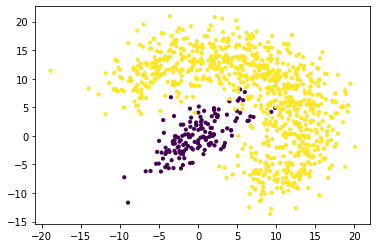

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: load dataset 1
data_set = np.load('dataset_1.npz')

# generic function to extract named properties from the data set items
# fs is a list of tuples, first a name, then a function mapping an item to a property
def property_table(fs, data_set):
    keys = list(data_set.keys()) # row names
    props = list(map(lambda f: f[0], fs)) # column names
    funcs = list(map(lambda f: f[1], fs)) # property functions
    items = list(map(lambda t: t[1], data_set.items())) # data items
    data = zip(*list(map(lambda f: map(f, items), funcs))) # each prop for each item
    df = pd.DataFrame(data, index=keys, columns=props) # use pandas.DataFrame to print a table
    display(df)
    
def dataset_info(ds):
    property_table([
        ('Count', lambda item: len(item)),
        ('Shape', lambda item: item.shape),
        ('Min', lambda item: np.round(np.amin(item, axis=0))),
        ('Max', lambda item: np.round(np.amax(item, axis=0))),
        ('Mean', lambda item: np.round(np.mean(item, axis=0))),
        ('Std', lambda item: np.round(np.std(item, axis=0))),
    ], ds)
    
dataset_info(data_set)


X = data_set['X']
y = data_set['y']
           
def class_counts(y):
    c = max(list(y)) + 1
    for i in range(0, c):
        print(f"Class {i} sample count: {len(list(filter(lambda x: x == i, y)))}")

class_counts(y)
plt.scatter(*zip(*X), s=10.0, c=y)


**TODO:** Describe the Naive Bayes classifier. Why is it called naive?

goal: classify for n classes

hyperparamters: none

training_parameters: pi_c, theta_j_c, my_j_c,  c from {0, number of classes - 1}, j from {0, number of features - 1}

testing_parameters: ?

The naive Bayes classifier is able to classify n classes. In order to do that it learns and optimizes
while training with MLE(other options?) the parameter pi_c, which is the class probability of class c and
j * c parameters theta_j_c and my_j_c, which are representing the standard deviation
and the mean for each feature and class combination. Therefore every theta_j_c and my_j_c
are belonging to own density function in the real-valued case(e. g. Gaussian) and to a probability mass
function in a discrete case(e. g. Bernouilli).
So one creates a relation between one feature and one class, this implies mutual independence of the features
otherwise j must be a set of features. The prediction for a new unknown point to be in class c is the product
of the probalities of the 'independent' features.

It is called naive, because it assumes mutually independence of the features,
but the opposite is given in most real world problems, hence there is
a correlation between the features (e. g. education and income).
In addition to that naive Bayes classifier ignores the Probality
of point x (= P(x)) in Bayes' theorem to get a more well to use function.

The reason is that P(x) is not depending on the class and the values of the
features of x_i are given, so that the denominator is effectively constant
(this sentence is Wikipedia quote, more information then the lecture or the lecture notes).

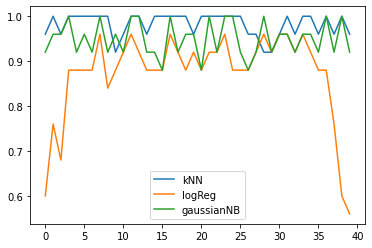

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# TODO: train a kNN, Logistic Regression, and a Naive Bayes classifier on the dataset. Report the accuracies.

CROSS_VAL_FOLDS=40

# train and score classifier using cross validation
def score(name, clf, data, y):
    scores = cross_val_score(clf, data, y, cv=CROSS_VAL_FOLDS)
    #print(f'{name}_scores = {scores}')
    plt.plot(scores, label=name)
            
# score a list of classifiers
def score_all(clfs, data, y):
    for (name, clf) in clfs:
        score(name, clf, data, y)
    plt.legend()

kNN = KNeighborsClassifier(5)
logReg = LogisticRegression()
gaussianNB = GaussianNB()

clfs = [
    ("kNN", kNN),
    ("logReg", logReg),
    ("gaussianNB", gaussianNB)
]
score_all(clfs, X, y)

**TODO:** Describe why the accuracy is not always suitable for evaluating a model's classification performace. Briefly define the alternative metrics from the lecture, and explain in which cases they are more suitable.

The accuracy score of two different models can be equal, but depending on the task, there can be different
costs for false positives and false negatives. In this cases the accuracy score is not sufficient enough.

An example for different costs is autonomous driving:
Better stop one time more, then crash into something/someone.
Furthermore the accuracy score lacks of a relation to the balance of the number of data points of the classes.
Imagine a data set with points with 90% from class 0 and 10% from class 1, in train and test set. Imagine now the
naive model, which predicts new data points always as class 0. Then the accuracy score is still 0.9, which at first sounds good, but in fact is not.

One alternative is precision, defined as TP / (TP + FP). This is a good measurement, if you are interested
in eliminating FPs, for example, when FPs have a higher cost then the FN. When optimizing this, one is interested
in reliability of the prediction of class +, without taking into account how many points are actually in class +.

Another alternative is recall with definition TP / (TP + FN). There the missing FP implies, that FP´s have a lower
cost then the FN´s. So you are interested in getting as much points of class +, without caring much about FP.
The disadvantage of both is, that they are not symmetric, so you get different results, when switching class + and -.

If there is a class imbalance, then the class with fewer data points should be class +. Therefore one disadvantage
of the accuracy did not vanish fully.
The third option is the combination of both: F1 = (Precision * Recall) / (Precision + Recall). Its a good choice, if one wants to optimize both precision and recall.

The fourth options are the true negative rate and the false positive rate, definite by
TNR = TN / TN + FP (best value 1, worst 0) and FPR = FP / FP + TN (best value 0, worst 1). They are a good tool, when one has no assumptions about the data set and is at the beginning of a project.

The last option for now is the receiver operating charateristics(=ROC). It is a graph with false positive rate
on the x-axis and the true positive rate on the y-axis on [0, 1]^2. For different parameters of models resulting in different combinations of false positive rate and true positive rate and therefore points. The first goal here is to be better then the TPR = FPR line and furthermore to minimize FPR and maximize TPR. You can decide between different models/ROC´s by
comparing the area under the curve(AUC). The bigger the AUC the better it is, the best AUC is equal to 1.


In [27]:
# TODO: analyze the dataset; focus on possible reasons for why you might want to apply the metrics described above
# 1) Balance between classes
class_count = np.zeros(max(y) + 1, np.int64)
for i in range(0, len(y)):
    class_count[y[i]] = class_count[y[i]] + 1

for i in range (0, len(class_count)):
    print('number instances class_' + str(i) + ': ' + str(class_count[i]))

# 2) Shape of the data set X
print('Shape of X: ' + str(X.shape))

number instances class_0: 150
number instances class_1: 850
Shape of X: (1000, 2)


There is a huge imbalance between the number of data points from class 0 and class 1. Therefore the accuracy score is not
well suited for evaluating the model(the reason was described in the task before).
The data set X has only 2 features/dimensions. Thats important for GaussionNB, because the more dimensions
the higher the probability, that they are not independend, thus the more likely the general assumption
is violated.

In [28]:
# TODO: reevalute your trained models with the metrics you described above.
# Visualize the confusion matrices for all classifiers

from sklearn.metrics import confusion_matrix

kNN = KNeighborsClassifier(5)
kNN_scores = cross_val_score(kNN, X, y, cv=10, scoring='precision')

logReg = LogisticRegression()
logReg_scores = cross_val_score(logReg, X, y, cv=10, scoring='precision')

gaussianNB = GaussianNB()
gaussianNB_scores = cross_val_score(gaussianNB, X, y, cv=10, scoring='precision')

print('kNN_scores precision= ' + str(kNN_scores))
print('logReg_scores precision= ' + str(logReg_scores))
print('gaussianNB_scores precision= ' + str(gaussianNB_scores))

kNN_scores precision= [0.97647059 1.         1.         0.98837209 1.         0.98837209
 0.98823529 0.97647059 0.98823529 0.98823529]
logReg_scores precision= [0.88888889 0.90217391 0.89473684 0.89473684 0.91397849 0.90425532
 0.89473684 0.92391304 0.93103448 0.775     ]
gaussianNB_scores precision= [0.96511628 0.96590909 0.94444444 0.95505618 0.92391304 0.94444444
 0.95505618 0.93406593 0.94444444 0.93406593]


In [29]:
kNN = KNeighborsClassifier(5)
kNN_scores = cross_val_score(kNN, X, y, cv=10, scoring='recall')

logReg = LogisticRegression()
logReg_scores = cross_val_score(logReg, X, y, cv=10, scoring='recall')

gaussianNB = GaussianNB()
gaussianNB_scores = cross_val_score(gaussianNB, X, y, cv=10, scoring='recall')

print('kNN_scores recall= ' + str(kNN_scores))
print('logReg_scores recall= ' + str(logReg_scores))
print('gaussianNB_scores recall= ' + str(gaussianNB_scores))

kNN_scores recall= [0.97647059 1.         0.95294118 1.         1.         1.
 0.98823529 0.97647059 0.98823529 0.98823529]
logReg_scores recall= [0.37647059 0.97647059 1.         1.         1.         1.
 1.         1.         0.95294118 0.36470588]
gaussianNB_scores recall= [0.97647059 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [30]:
kNN = KNeighborsClassifier(5)
kNN_scores = cross_val_score(kNN, X, y, cv=10, scoring='f1')

logReg = LogisticRegression()
logReg_scores = cross_val_score(logReg, X, y, cv=10, scoring='f1')

gaussianNB = GaussianNB()
gaussianNB_scores = cross_val_score(gaussianNB, X, y, cv=10, scoring='f1')

print('kNN_scores f1= ' + str(kNN_scores))
print('logReg_scores f1= ' + str(logReg_scores))
print('gaussianNB_scores f1= ' + str(gaussianNB_scores))

kNN_scores f1= [0.97647059 1.         0.97590361 0.99415205 1.         0.99415205
 0.98823529 0.97647059 0.98823529 0.98823529]
logReg_scores f1= [0.52892562 0.93785311 0.94444444 0.94444444 0.95505618 0.94972067
 0.94444444 0.96045198 0.94186047 0.496     ]
gaussianNB_scores f1= [0.97076023 0.98265896 0.97142857 0.97701149 0.96045198 0.97142857
 0.97701149 0.96590909 0.97142857 0.96590909]


kNN_scores roc_auc= [0.99686275 1.         0.99607843 1.         1.         0.99960784
 0.96509804 0.99137255 0.99529412 0.99137255]
logReg_scores roc_auc= [0.59921569 0.90352941 0.98196078 0.99843137 1.         0.99843137
 1.         0.92862745 0.8        0.34431373]
gaussianNB_scores roc_auc= [0.96862745 0.99764706 0.99372549 1.         1.         1.
 1.         0.97411765 0.95137255 0.91607843]


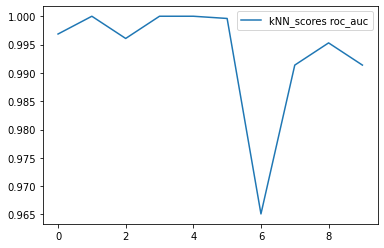

In [36]:
kNN = KNeighborsClassifier(5)
kNN_scores = cross_val_score(kNN, X, y, cv=10, scoring='roc_auc')

logReg = LogisticRegression()
logReg_scores = cross_val_score(logReg, X, y, cv=10, scoring='roc_auc')

gaussianNB = GaussianNB()
gaussianNB_scores = cross_val_score(gaussianNB, X, y, cv=10, scoring='roc_auc')

print('kNN_scores roc_auc= ' + str(kNN_scores))
plt.plot(kNN_scores, label="kNN_scores roc_auc")
plt.legend()
print('logReg_scores roc_auc= ' + str(logReg_scores))
print('gaussianNB_scores roc_auc= ' + str(gaussianNB_scores))

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

kNN = KNeighborsClassifier(5)
kNN_predict = cross_val_predict(kNN, X, y, cv=10)
kNN_confusion_matrix = confusion_matrix(y, kNN_predict)

logReg = LogisticRegression()
logReg_predict = cross_val_predict(logReg, X, y, cv=10)
logReg_confusion_matrix = confusion_matrix(y, logReg_predict)

gaussianNB = GaussianNB()
gaussianNB_predict = cross_val_predict(gaussianNB, X, y, cv=10)
gaussianNB_confusion_matrix = confusion_matrix(y, gaussianNB_predict)

print('kNN_scores confusion matrix= ' + str(kNN_confusion_matrix))
print('logReg_scores confusion matrix= ' + str(logReg_confusion_matrix))
print('gaussianNB_scores confusion matrix= ' + str(gaussianNB_confusion_matrix))

kNN_scores confusion matrix= [[141   9]
 [ 11 839]]
logReg_scores confusion matrix= [[ 68  82]
 [113 737]]
gaussianNB_scores confusion matrix= [[102  48]
 [  2 848]]


We could switch class 0 and class 1 and apply the metrics ones more, because the precision and recall
are not symmetric. However the rule is that the first class is the one with the lower number of data points,
therefore we do not apply precision and recall on switched classes. The ROC-score is symmetric.

**TODO:** Describe and analyze your findings. Keep in mind your investigation of the dataset.

kNN and GaussianNB worked well on the data set(measured by precision, recall and especially ROC-score).
The reason is probably, that the problem is a non-linear one, as the bad results of the linear regression
model indicates in a few folds. However this indicates that a linear logistic regression is not reliable
on this problem.

## Additional Steps required

???
Scale your data?
Min-max scaling:
Standardization: Better for data sets with outlier => calculate standard deviation
Robust scaling:

In [38]:
import numpy as np

# load second dataset
data_set = np.load('dataset_2.npz')
X = data_set['X']
y = data_set['y']

dataset_info(data_set)

class_counts(y)

,Count,Shape,Min,Max,Mean,Std
X,2000,"(2000, 7)","[-100.0, -100.0, -100.0, -15.0, -100.0, -22.0,...","[100.0, 100.0, 100.0, 22.0, 100.0, 20.0, 100.0]","[-2.0, -1.0, 1.0, 2.0, 0.0, -1.0, 2.0]","[57.0, 58.0, 57.0, 7.0, 58.0, 7.0, 59.0]"
y,2000,"(2000,)",0,2,1,1


Class 0 sample count: 200
Class 1 sample count: 800
Class 2 sample count: 1000


raw.mean() = [-1.66785369 -1.46791693  0.71401576  2.40657653  0.2238962  -1.19126005
  1.78061454]
raw.std() = [57.42951361 57.58557726 56.65656124  7.39527504 57.76060814  7.45143671
 58.64520968]


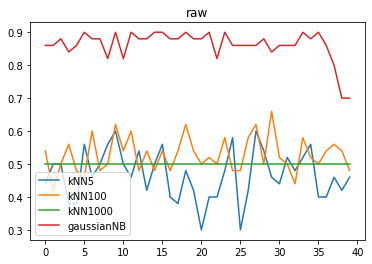

In [40]:
#TODO: Train all three classifiers on the second data set
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def dist_info(name, data):
    print(f'{name}.mean() = {np.mean(data, axis=0)}')
    print(f'{name}.std() = {np.std(data, axis=0)}')

# test classifiers on an input
def test(clfs, name, data, y):
    dist_info(name, data)
    plt.title(name)
    #print(f'{name} = {data}')
    score_all(clfs, data, y)

# causes error with unscaled dataset
#score("logReg", logReg, X, y)

kNN5 = KNeighborsClassifier(5)
kNN100 = KNeighborsClassifier(100)
kNN1000 = KNeighborsClassifier(1000)
logReg = LogisticRegression()
gaussianNB = GaussianNB()
clfs_without_log = [
    ("kNN5", kNN5),
    ("kNN100", kNN100),
    ("kNN1000", kNN1000),
    ("gaussianNB", gaussianNB)
]
clfs = [
    *clfs_without_log,
    ("logReg", logReg),
]
test(clfs_without_log, "raw", X, y)

min_max.mean() = [0.49217359 0.49266428 0.50352962 0.46603852 0.50109592 0.49020206
 0.50912906]
min_max.std() = [0.28764025 0.28811128 0.2833488  0.20001988 0.28892953 0.1780207
 0.29338672]
robust.mean() = [-0.00812176  0.02078122  0.00759399  0.07346281 -0.00337467 -0.05339322
 -0.01594031]
robust.std() = [0.58251288 0.57134835 0.58321217 0.5986119  0.57939802 0.73859548
 0.56927511]


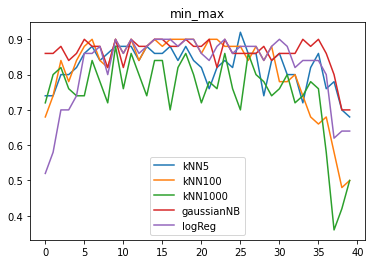

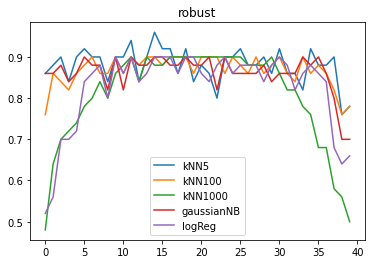

In [11]:
# test classifiers on a list of inputs
def test_all(clfs, data_list, y):
    for (i, (name, data)) in list(enumerate(data_list)):
        plt.figure(i)
        test(clfs, name, data, y)
        
def scale(data, scaler):
    return scaler.fit_transform(data)

# scale
min_max_scaled = scale(X, MinMaxScaler())
robust_scaled = scale(X, RobustScaler())

X_list = [
    ("min_max", min_max_scaled),
    ("robust", robust_scaled),
]
# test classifiers
test_all(clfs, X_list, y)

**TODO:** Analyze the second data set and your results.

The second dataset has twice as many samples as the first dataset and three classes instead of two. Also its feature space has seven dimensions instead of two. The data for some features is also a lot more spread out than in the first data set, with a standard deviation of approximately (57.0, 58.0, 57.0, 7.0, 58.0, 7.0, 59.0) versus (7.0, 7.0) for the first data set.

This high variance is a problem for the logistic regression algorithm, because it can not find a good estimate for a decision boundary. Appearently the sklearn library expects the data for the logistic regression algorithm to be scaled, because it seems to assume the algorithm does not converge to a solution, if the error for each iteration of the algorithm changes by more than some threshold. Using simple scaling like MinMax solves this problem for logReg.

It is also noticable that the kNN classifier performs very badly on the unscaled dataset, even for different choices of k. This happens because in the unscaled data, the variances for the different features are very different, which makes features with lower variance contribute more to the classification, because they are closer together. Features with larger variance are not taken into account as much, because their points are more spread out and are less likely to be neighbors to other points. Scaling the variance of the data to more similar values fixes this problem for the kNN classifier.

The gaussian naive bayes classifier seems to perform equally well on the unscaled as on the scaled data. This is due to its assumption, that features are independent of each other. The gaussianNB estimates a probability distribution for each class on each feature independently, avoiding the effects of different scaling between different features.

### Standardized data sets

A data set $ \{\vec{x}_i \mid i\in\{1,\dots n\} \}\;\vec{x}_i \in \mathbb{R}^{d} $ consisting of $ n $ samples is called *standardized* if each feature $ j $ has zero mean and unit variance. Thus:

$$
\mu_j = \frac{1}{n}\sum_i (\vec{x}_i)_j = 0 \quad \text{ and }
\sigma^2_j = \frac{1}{n}\sum_i \Big( (\vec{x}_i)_j - \mu_j\Big)^2 = 1 \quad \forall\, j\in\{1,\dots,d\}.
$$

**Prove** that the following transformation scales a data set into a standardized one
$$(\vec{x}'_i)_j = \frac{(\vec{x}_i)_j - \mu_j}{\sigma_j}.$$

We show that for any dataset $ X = \{\vec{x}_i \in \mathbb{R}^{d} \mid i\in\{1,\dots n\} \} $ with $ n, d \in \mathbb{N} $, the transformed dataset
$$
X' = \{ \vec{x}'_i \in \mathbb{R}^{d} \mid (\vec{x}'_i)_j = \frac{(\vec{x}_i)_j - \mu_j}{\sigma_j}, i \in\{1,\dots n\}, j \in\{1,\dots d\} \}
$$
is standardized:

First, we show that the mean $ \mu'_j $ of $ X' $ is zero:
\begin{align}
\mu'_j &= \frac{1}{n}\sum_i (\vec{x}'_i)_j = \frac{1}{n}\sum_i \frac{(\vec{x}_i)_j - \mu_j}{\sigma_j} = \frac{1}{n \sigma_j}\sum_i \Big((\vec{x}_i)_j - \mu_j\Big) = \frac{1}{n \sigma_j}\Big(\sum_i (\vec{x}_i)_j - \sum_i \mu_j\Big) \\
\sum_i \mu_j &= \sum_i \Big(\frac{1}{n}\sum_k (\vec{x}_k)_j\Big) = n\Big(\frac{1}{n}\sum_k (\vec{x}_k)_j\Big) = \sum_k (\vec{x}_k)_j \\
\implies \mu'_j &= \frac{1}{n \sigma_j}\Big(\sum_i (\vec{x}_i)_j - \sum_i (\vec{x}_i)_j\Big) = 0
\end{align}
Second, we show that the variance $ \sigma'^2_j $ of $ X' $ is one:
\begin{align}
\sigma'^2_j &= \frac{1}{n}\sum_i \Big( (\vec{x}'_i)_j - \mu'_j\Big)^2 \\
mu'_j = 0 \implies \sigma'^2_j &= \frac{1}{n}\sum_i (\vec{x}'_i)_j^2 = \frac{1}{n}\sum_i \Big(\frac{(\vec{x}_i)_j - \mu_j}{\sigma_j}\Big)^2 \\ &= \frac{1}{n\sigma^2_j}\sum_i \Big((\vec{x}_i)_j - \mu_j\Big)^2 \\ &= \frac{1}{\sigma^2_j}\frac{1}{n}\sum_i \Big((\vec{x}_i)_j - \mu_j\Big)^2 \\ &= \frac{\sigma^2_j}{\sigma^2_j} = 1
\end{align}
Therefore the dataset $ X' $ is standardized. $\square$

standardized.mean() = [ 2.79776202e-17 -1.11022302e-17  3.43657394e-17 -7.12763182e-16
 -4.60187444e-17  2.07611706e-17 -1.68615122e-17]
standardized.std() = [1. 1. 1. 1. 1. 1. 1.]


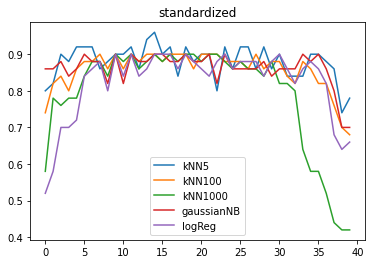

In [12]:
#TODO: Try this in practice,
#      retrain and test the models on the standardized dataset

standard = StandardScaler()
standard_scaled = scale(X, standard)
X_list = [
    ("standardized", standard_scaled),
]
test_all(clfs, X_list, y)

**TODO:** Analyze your results.

Using a standard scaler results in a dataset with near-zero mean and a variance of 1 for all features. The mean is not exactly zero due to limited floating-point precision, which means that the calculated mean of the original dataset may not exactly match its true mean. The error between the actual mean and the floating point representation is what causes the mean of the transformed dataset to not be exactly zero. But it is so close to zero that it is practically zero.

The scaling removed the varying variances between the features which allows the kNN classifier to make better predictions. Also logistic regression now converges, because the error for the decision boundary doesn't exceed a certain threshold anymore.

The gaussianNB classifier does not perform differently for different scalings, as this plot illustrates:

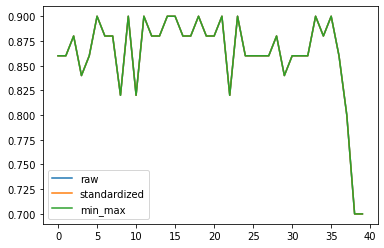

In [13]:
score("raw", gaussianNB, X, y)
score("standardized", gaussianNB, standard_scaled, y)
score("min_max", gaussianNB, min_max_scaled, y)
plt.legend()

Therefore it does not seem to be necessary to use normalization with a gaussian naive bayes classifier.

Here is another visualization of the second data set:

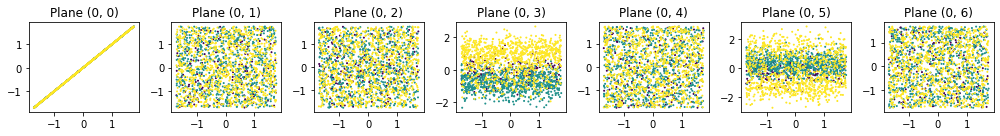

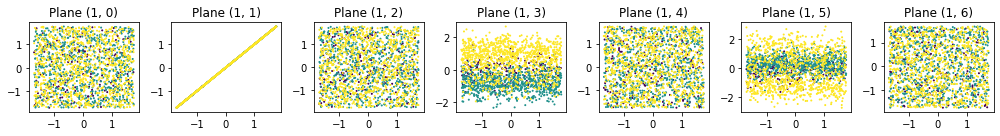

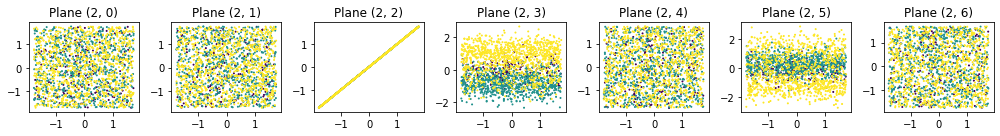

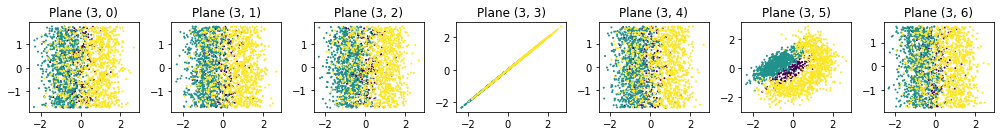

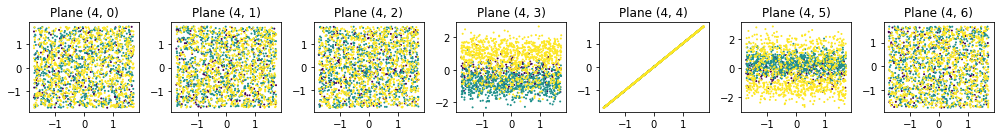

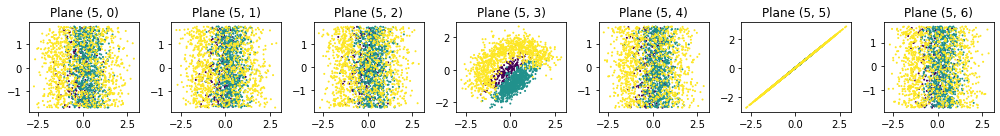

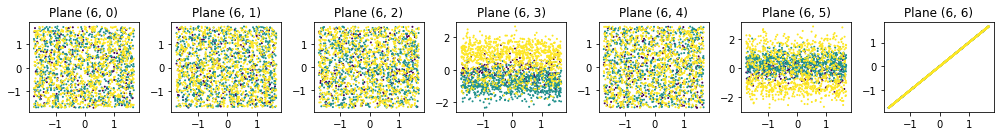

In [20]:
import math
import matplotlib.pyplot as plt

def plane(X, a, b):
    return list(map(lambda v: [v[a], v[b]], X))

def gauss_sum(n):
    return int((n**2+n)/2)

def plot_plane(X, ax, a, b):
    #min = np.minimum(a,b)
    #b = np.maximum(a,b)
    #a=min
    p=plane(X, a, b)
    ax.scatter(*zip(*p), s=1.0,  c=y)
    ax.set_title(f"Plane ({a}, {b})")
    
def plot_hyperspace(X, ):
    dim_count = len(X[0])
    #print(f"dim_count = {dim_count-1}")

    plane_count = gauss_sum(dim_count-1)
    #print(f"{plane_count}")

    grid_width = 7
    grid_height = math.ceil(plane_count/grid_width)
    #print(f"grid_height = {grid_height}")

    plt.close('all')
    width=dim_count
    for a in range(0, width):
        fig, axs = plt.subplots(1, width)
        fig.set_figwidth(width*2)
        fig.set_figheight(2)
        for b in range(0, width):
            #k = b + a*width
            #print(f"k={k} p=({a}, {b})")
            plot_plane(X, axs[b], a, b)
        plt.tight_layout()



plot_hyperspace(standard_scaled)